<a href="https://www.kaggle.com/code/lorresprz/linkedin-tech-jobs-in-india-2023?scriptVersionId=145311505" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
df = pd.read_csv('/kaggle/input/linkedin-jobs/final_data.csv')

# Dataset overview

In [4]:
df.sample(6)

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
299,IDESLABS PRIVATE LIMITED,Class 4,Jr. Software Engineer,Uttar Pradesh,0,80865,Full-time,Entry level,1200,IT Services and IT Consulting,...,0,1,1,0,0,0,0,0,0,0
128,LTIMindtree,Class 1,Obiee Developer,Karnataka,4,270280,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,0,0,0,0,0,0,0,0
762,Uplers,Class 2,Search Engine Marketing Manager,Karnataka,3,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
144,LTIMindtree,Class 1,'Java Full stack Developer',Maharashtra,42,270280,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,1,1
689,Uplers,Class 2,Web Developer - Python,Karnataka,112,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,0,0,0,1,1
34,Wipro,Class 3,Delivery Assurance Manager,Karnataka,3,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0


In [5]:
df.columns

Index(['Company_Name', 'Class', 'Designation', 'Location', 'Total_applicants',
       'LinkedIn_Followers', 'Level', 'Involvement', 'Employee_count',
       'Industry', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML'],
      dtype='object')

# Most in-demand tech positions

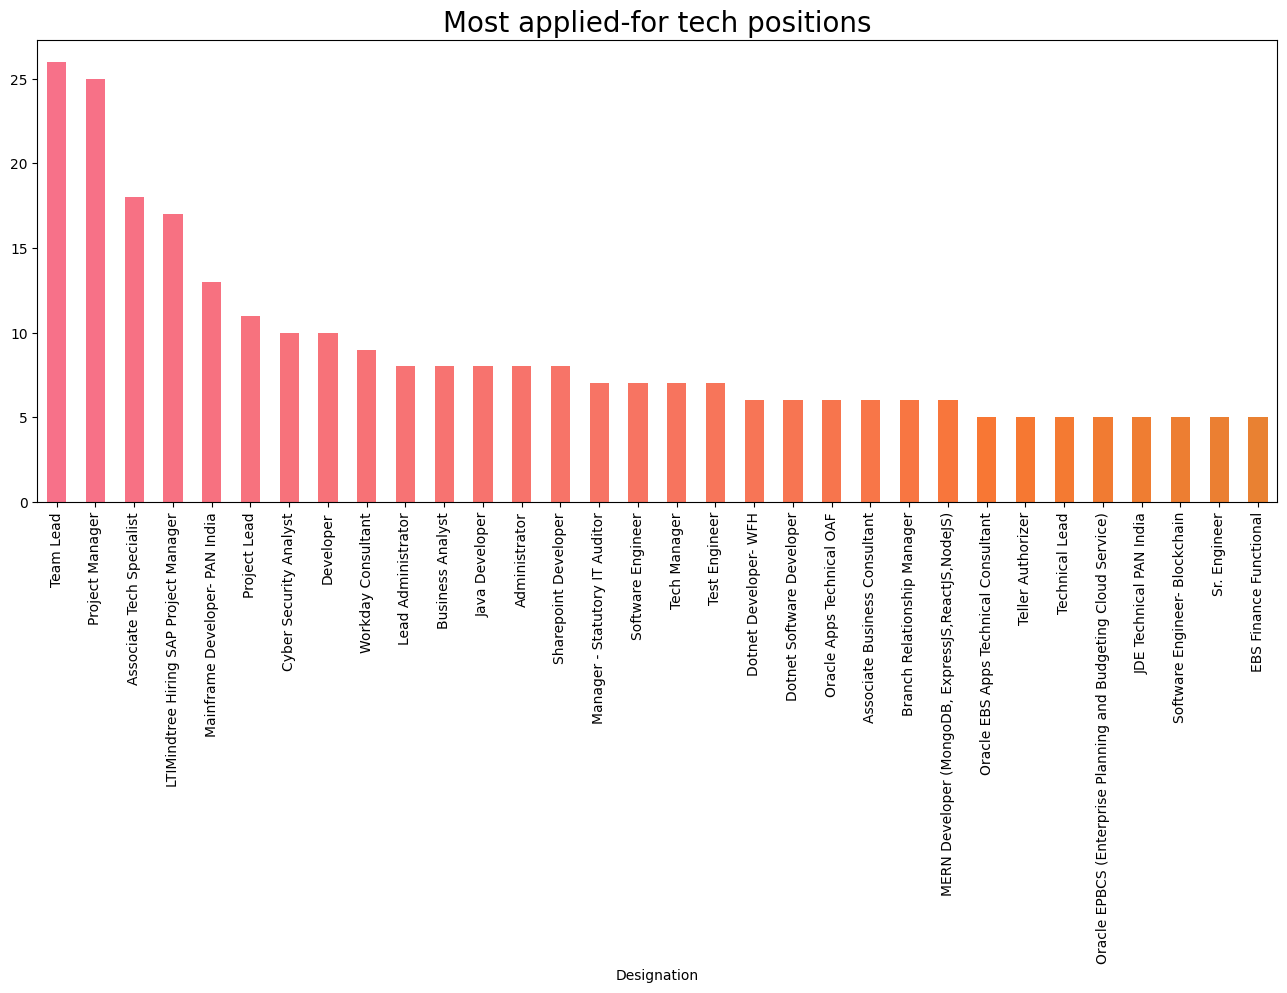

In [6]:
positions = df.Designation.value_counts().sort_values(ascending = False)
#Only look at top 30 positions
plt.figure(figsize = (16,6))
positions[:32].plot(kind = 'bar', color = sns.color_palette("husl", len(positions)))
plt.title('Most applied-for tech positions', fontsize = 20);

# Profiles of hiring industries

In this section we look at the profiles of each hiring industry and the distributions of roles offered.

In [7]:
df.Industry.nunique(), df.Industry.unique()

(4,
 array([' IT Services and IT Consulting',
        ' Technology, Information and Internet', ' Real Estate',
        ' Telecommunications'], dtype=object))

In [8]:
df_industry = df.groupby(['Industry']).sum()

In [9]:
df.Involvement.nunique(), df.Involvement.unique()

(4,
 array([' Entry level', ' Mid-Senior level', ' Director', ' Associate'],
       dtype=object))

In [10]:
df_involvement = df.groupby(['Involvement']).sum()

Text(0, 0.5, '')

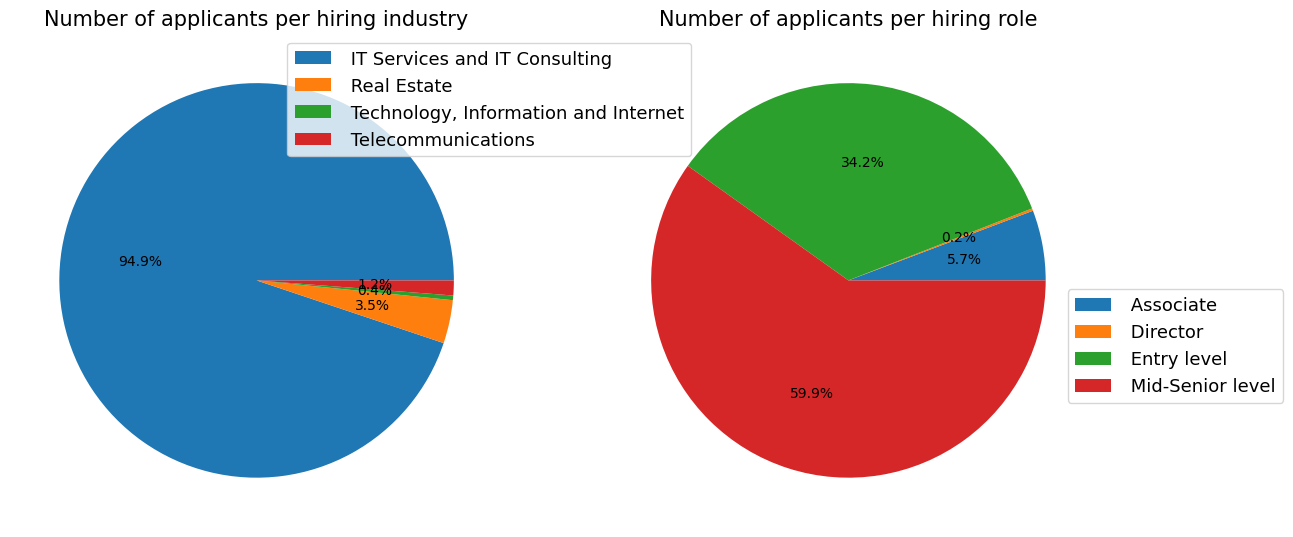

In [11]:
fig, ax = plt.subplots(1,2, figsize = (14,18))
df_industry['Total_applicants'].plot.pie(autopct='%1.1f%%', ax = ax[0], labeldistance = None)
ax[0].legend(bbox_to_anchor=(1.4,1.0), loc="upper right", fontsize=13, )
ax[0].set_title('Number of applicants per hiring industry', fontsize =15)
ax[0].set_ylabel('')

df_involvement['Total_applicants'].plot.pie(autopct='%1.1f%%', ax = ax[1], labeldistance = None)
ax[1].legend(bbox_to_anchor=(1.4,0.5), loc="upper right", fontsize=13, )
ax[1].set_title('Number of applicants per hiring role', fontsize = 15)
ax[1].set_ylabel('')

From the charts above, it seems that IT services and consulting is the sector with the most active hiring. For the types of roles offered, entry level and mid-senior level roles are the most offered. 

Text(0.5, 0, 'Total applicants')

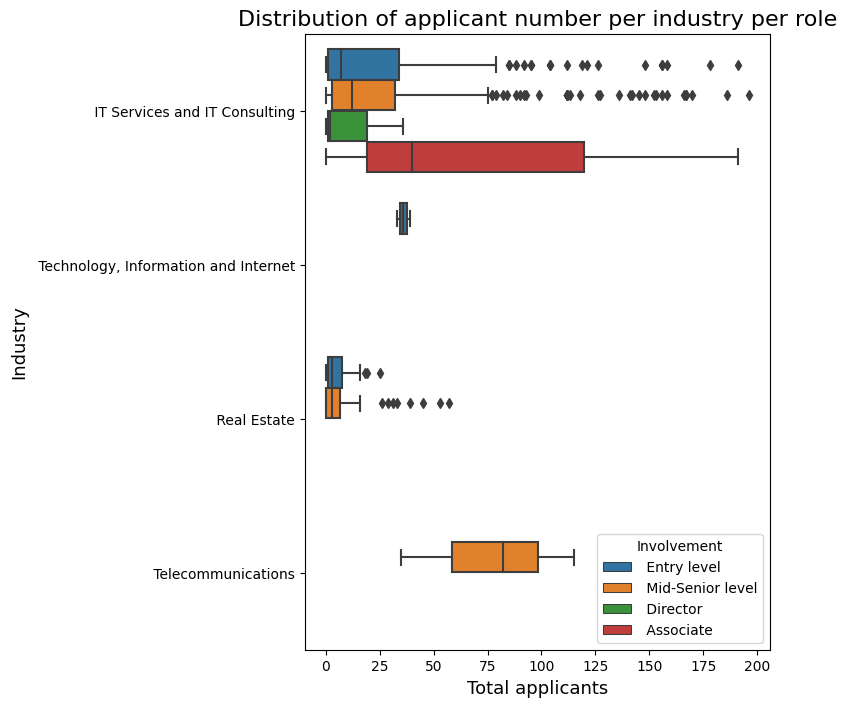

In [12]:
fig, ax = plt.subplots(figsize = (6,8))
sns.boxplot(x = df['Total_applicants'], y =df['Industry'], hue = df['Involvement'])
ax.set_title('Distribution of applicant number per industry per role', fontsize = 16)
ax.set_ylabel('Industry', fontsize = 13)
ax.set_xlabel('Total applicants', fontsize = 13)

# Most in-demand tech skills

In [13]:
tech_skills = df_industry[df_industry.columns[9:]].sum().sort_values(ascending = False)


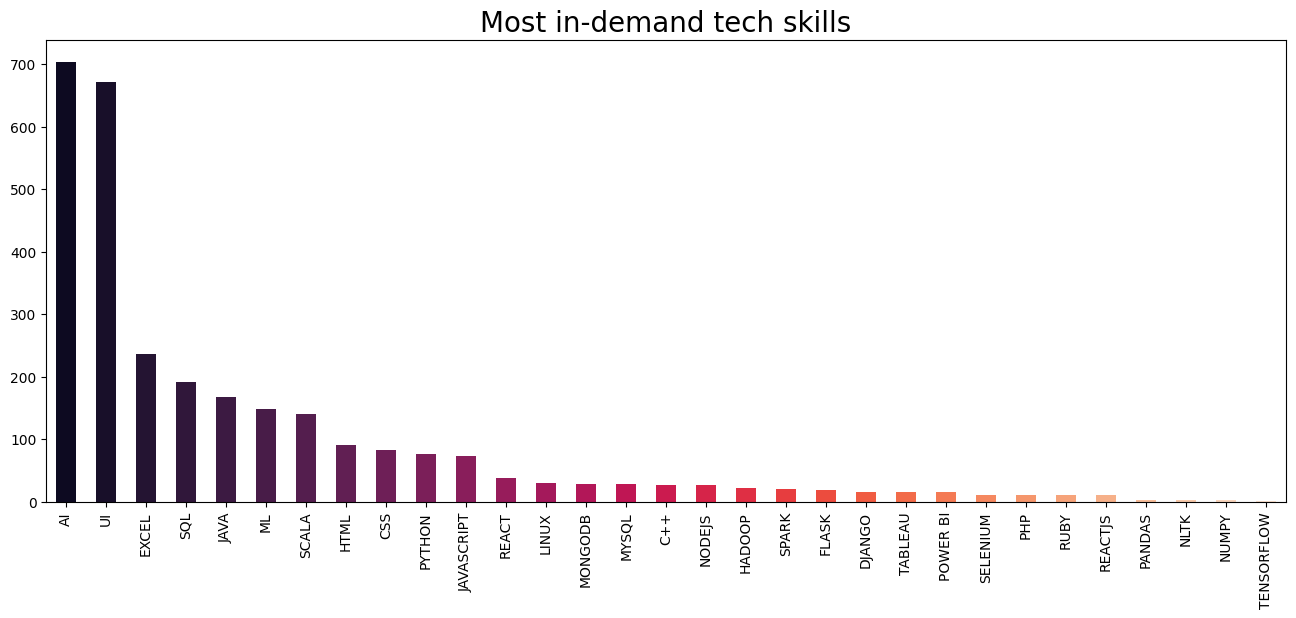

In [14]:
plt.figure(figsize = (16,6))
tech_skills.plot(kind = 'bar', color = sns.color_palette("rocket", len(tech_skills)))
plt.title('Most in-demand tech skills', fontsize = 20);

# Profiles of  hiring companies

In [15]:
df.Location.nunique(),df.Location.unique() 

(16,
 array([' Maharashtra', ' Delhi', ' Telangana', ' Karnataka', ' Haryana',
        ' Tamil Nadu', ' Uttar Pradesh', ' West Bengal', ' Kerala',
        ' Madhya Pradesh', ' Odisha', ' Andhra Pradesh', ' Rajasthan',
        ' India', ' Gujarat', ' Punjab'], dtype=object))

In [16]:
#Locations of companies
df_company_loc = df.groupby(['Location']).sum()

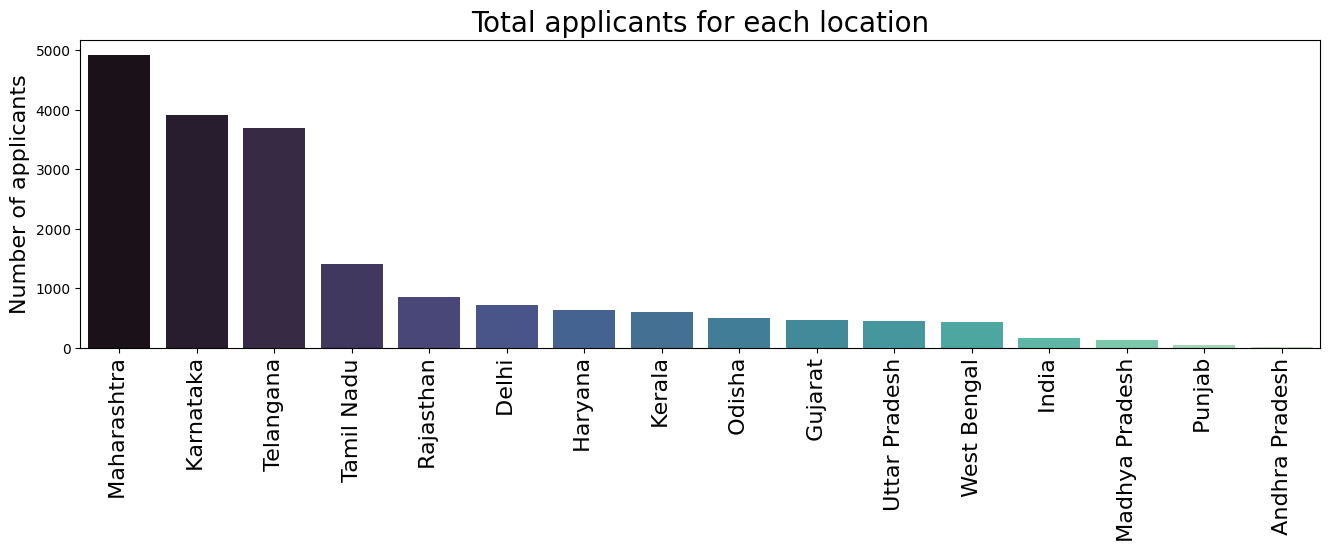

In [17]:
total_applicants_loc = df_company_loc['Total_applicants'].sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (16,4))
#TOTAL APPLICANTS PER LOCATION
sns.barplot(x=total_applicants_loc.index, y=total_applicants_loc.values, palette = 'mako')
ax.set_title('Total applicants for each location', fontsize = 20)
ax.set_ylabel('Number of applicants', fontsize = 16)
ax.set_xlabel('')
ax.set_xticklabels(total_applicants_loc.index, rotation=90, fontsize = 16);

In [18]:
df.Company_Name.nunique(), df.Company_Name.unique()

(11,
 array(['Wipro', 'LTIMindtree', 'IDESLABS PRIVATE LIMITED',
        'Cactus Communications', 'ACURA SOLUTIONS LTD', 'UST',
        'Vodafone Idea Limited', 'Tata Consultancy Services', 'Uplers',
        'Infosys', 'Genpact'], dtype=object))

In [19]:
dfc = df.drop(['Class', 'Designation', 'Location', 'Level', 'Involvement', 'Industry'], axis = 1)
df_company = dfc.groupby(['Company_Name']).mean()

In [20]:
mean_applicants = df_company['Total_applicants'].sort_values(ascending = False)
mean_employees = df_company['Employee_count'].sort_values(ascending = False)
mean_LinkedIn_followers = df_company['LinkedIn_Followers'].sort_values(ascending = False)

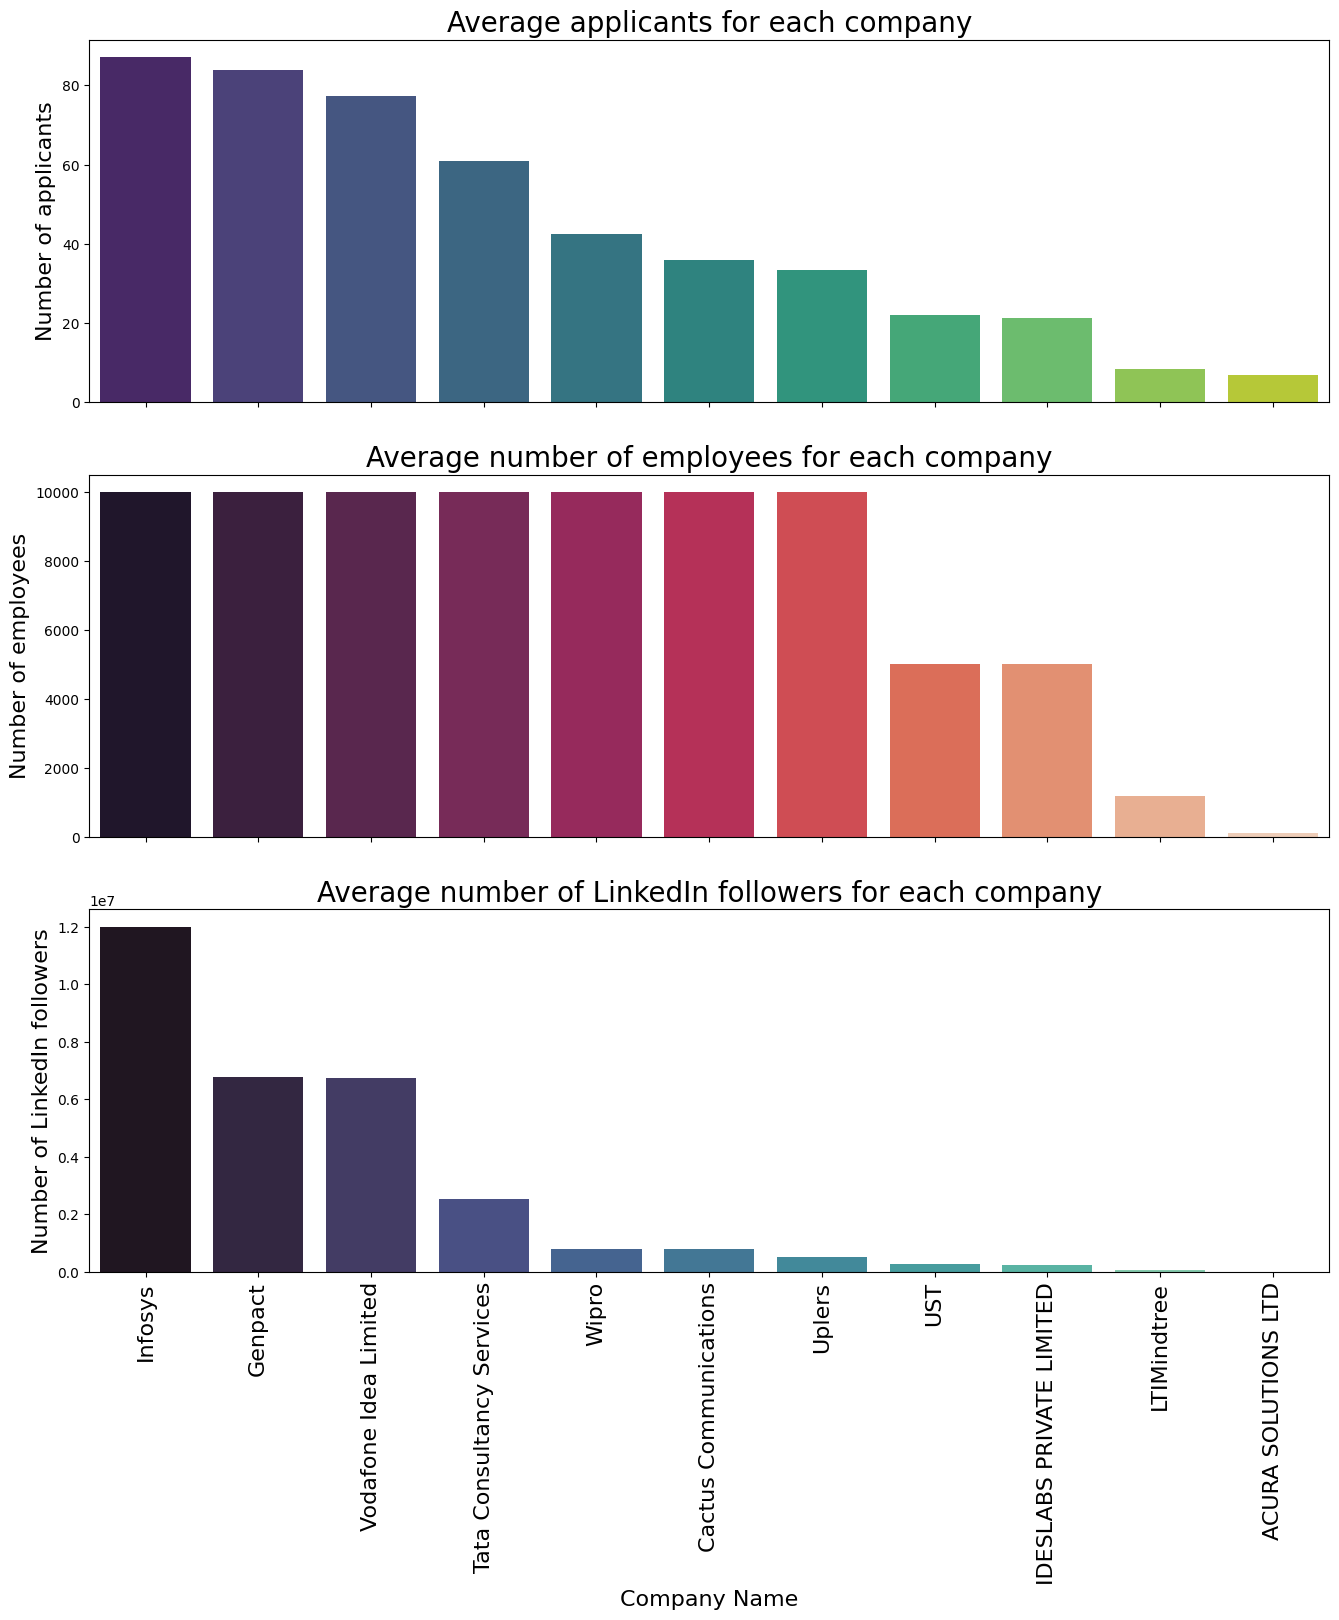

In [21]:
fig, ax = plt.subplots(3,1, figsize = (16,16), sharex = True)

#AVERAGE APPLICANTS
#df_company['Total_applicants'].plot(kind = 'bar', ax = ax[0])
sns.barplot(x=mean_applicants.index, y=mean_applicants.values, palette = 'viridis', ax = ax[0])
ax[0].set_title('Average applicants for each company', fontsize = 20)
ax[0].set_ylabel('Number of applicants', fontsize = 16)
ax[0].set_xlabel('')

#AVERAGE EMPLOYEE COUNT
#df_company['Employee_count'].plot(kind = 'bar', ax = ax[1])
sns.barplot(x=mean_employees.index, y=mean_employees.values, palette = 'rocket', ax = ax[1])
ax[1].set_title('Average number of employees for each company', fontsize = 20)
ax[1].set_ylabel('Number of employees', fontsize = 16)
ax[1].set_xlabel('')

#AVERAGE LINKEDIN FOLLOWERS
#df_company['LinkedIn_Followers'].plot(kind = 'bar', ax = ax[2])
sns.barplot(x=mean_LinkedIn_followers.index, y=mean_LinkedIn_followers.values, palette = 'mako', ax = ax[2])
ax[2].set_title('Average number of LinkedIn followers for each company', fontsize = 20)
ax[2].set_ylabel('Number of LinkedIn followers', fontsize = 16)
ax[2].set_xlabel('Company Name', fontsize = 16)
ax[2].set_xticklabels(mean_applicants.index, rotation=90, fontsize = 16);

# Skills required for entry, mid-senior, associate, director level tech positions

In [22]:
df_entry = df[df['Involvement'] == ' Entry level']
df_mid = df[df['Involvement'] == ' Mid-Senior level']
df_assoc = df[df['Involvement'] == ' Associate']
df_dir = df[df['Involvement'] == ' Director']

In [23]:
entry_requirements = df_entry[df_entry.columns[10:]].sum()
mid_requirements = df_mid[df_mid.columns[10:]].sum()
assoc_requirements = df_assoc[df_assoc.columns[10:]].sum()
dir_requirements = df_dir[df_dir.columns[10:]].sum()

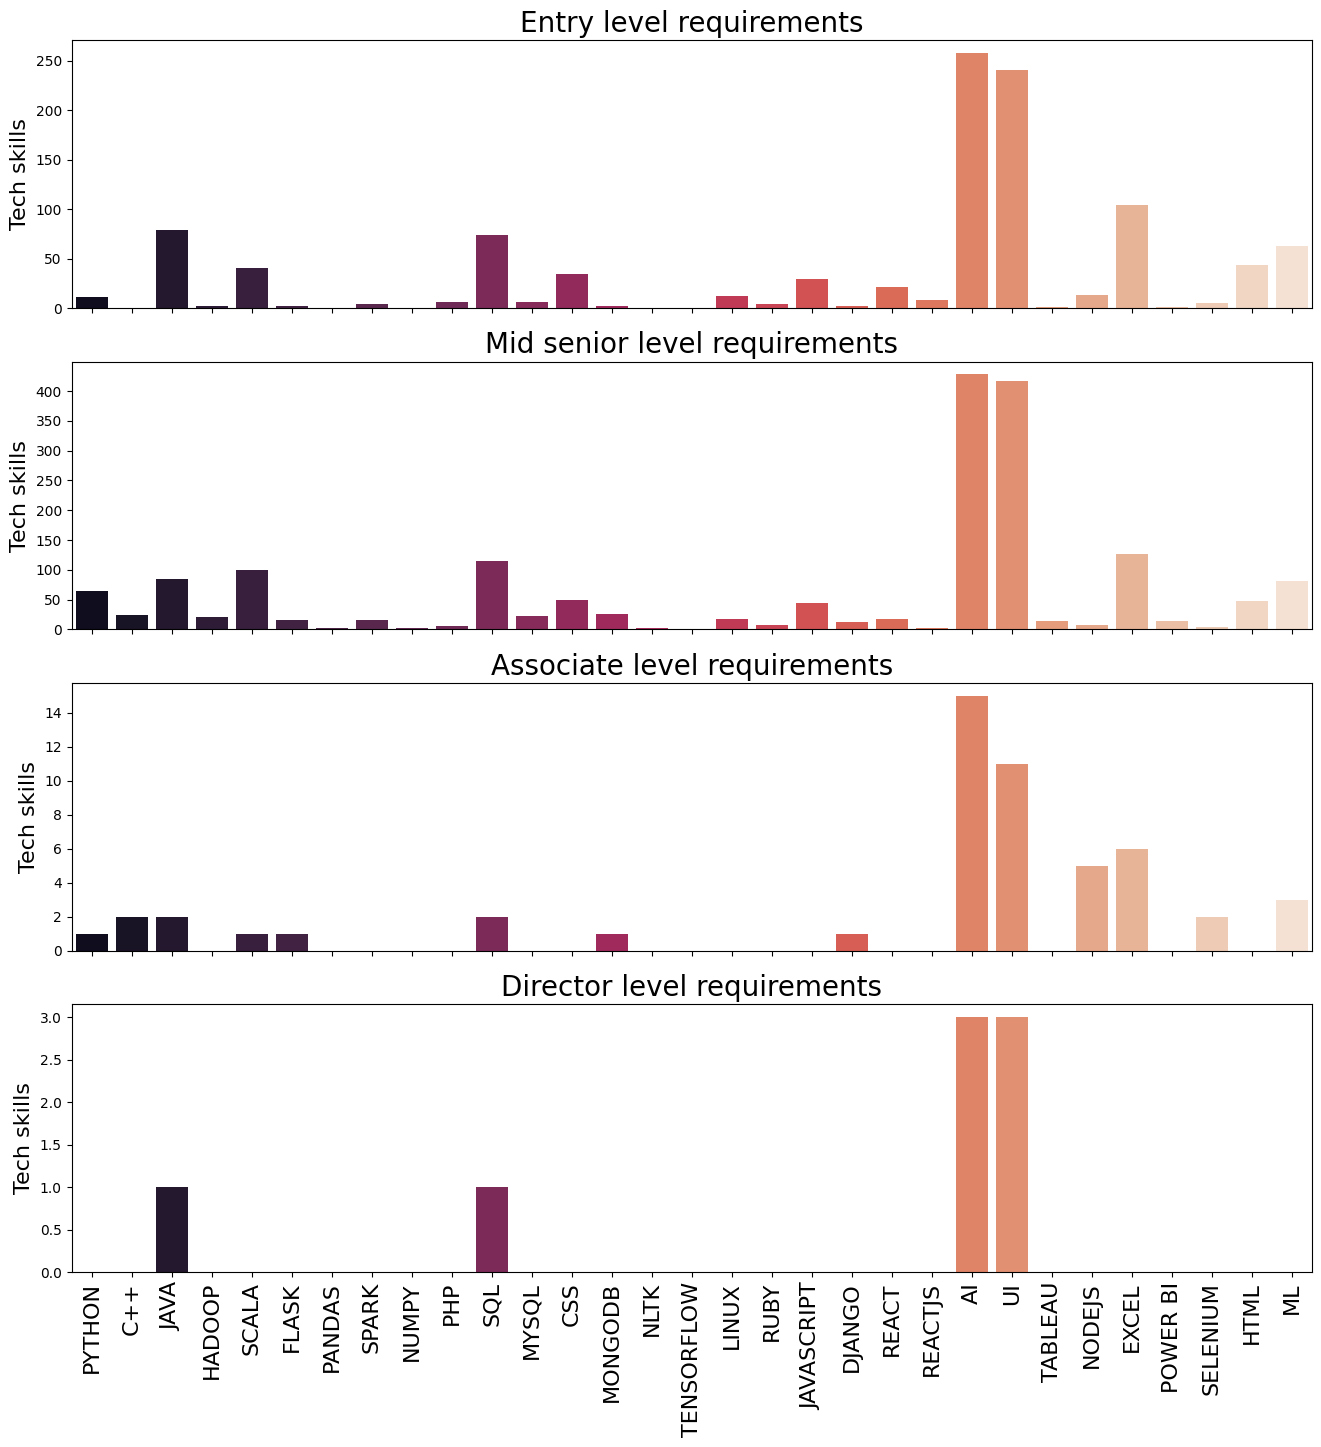

In [24]:
fig, ax = plt.subplots(4,1, figsize = (16,16), sharex = True)

#ENTRY LEVEL REQUIREMENTS
#df_company['Employee_count'].plot(kind = 'bar', ax = ax[1])
sns.barplot(x=entry_requirements.index, y=entry_requirements.values, palette = 'rocket', ax = ax[0])
ax[0].set_title('Entry level requirements', fontsize = 20)
ax[0].set_ylabel('Tech skills', fontsize = 16)
ax[0].set_xlabel('')

#MID LEVEL REQUIREMENTS
#df_company['Employee_count'].plot(kind = 'bar', ax = ax[1])
sns.barplot(x= mid_requirements.index, y= mid_requirements.values, palette = 'rocket', ax = ax[1])
ax[1].set_title('Mid senior level requirements', fontsize = 20)
ax[1].set_ylabel('Tech skills', fontsize = 16)
ax[1].set_xlabel('')

#ASSOCIATE LEVEL REQUIREMENTS
#df_company['Employee_count'].plot(kind = 'bar', ax = ax[1])
sns.barplot(x= assoc_requirements.index, y= assoc_requirements.values, palette = 'rocket', ax = ax[2])
ax[2].set_title('Associate level requirements', fontsize = 20)
ax[2].set_ylabel('Tech skills', fontsize = 16)
ax[2].set_xlabel('')

#DIRECTOR LEVEL REQUIREMENTS
#df_company['Employee_count'].plot(kind = 'bar', ax = ax[1])
sns.barplot(x= dir_requirements.index, y= dir_requirements.values, palette = 'rocket', ax = ax[3])
ax[3].set_title('Director level requirements', fontsize = 20)
ax[3].set_ylabel('Tech skills', fontsize = 16)
ax[3].set_xlabel('')

ax[3].set_xticklabels(dir_requirements.index, rotation=90, fontsize = 16);